# Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline

# Load dataset

In [2]:
df = pd.read_csv('data/train.csv', index_col = 'id')
df_test = pd.read_csv('data/test.csv', index_col = 'id')

In [3]:
print(df.shape, df_test.shape)

(300000, 24) (200000, 23)


# Information and Description

In [4]:
df.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 22  m

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bin_0,300000.0,0.127503,0.333537,0.0,0.0,0.0,0.0,1.0
bin_1,300000.0,0.256607,0.436761,0.0,0.0,0.0,1.0,1.0
bin_2,300000.0,0.383223,0.486173,0.0,0.0,0.0,1.0,1.0
ord_0,300000.0,1.479567,0.712524,1.0,1.0,1.0,2.0,3.0
day,300000.0,3.007817,1.817949,1.0,2.0,3.0,4.0,7.0
month,300000.0,5.771113,3.843519,1.0,2.0,4.0,9.0,12.0
target,300000.0,0.305880,0.460780,0.0,0.0,0.0,1.0,1.0


# EDA (Exploratory Data Analysis)

The bin_3,4 variable are object type. bin_0,1,2 variable have data 0,1 but bin_3,4 have T,F / Y,N alphabet value.
We must change T,F to 1,0 int data type for analysis easily.

In [7]:
df_summary = pd.DataFrame()
df_summary['name'] = df.columns
df_summary['type'] = df.dtypes.values
df_summary['nunique'] = df.nunique().values
df_summary['na_cnt'] = df.isna().sum().values
df_summary.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
name,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
type,int64,int64,int64,object,object,object,object,object,object,object,...,object,int64,object,object,object,object,object,int64,int64,int64
nunique,2,2,2,2,2,3,6,6,6,4,...,11981,3,5,6,15,26,192,7,12,2
na_cnt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
bin_cols = [ col for col in df.columns if col.startswith('bin_')]
nom_cols = [ col for col in df.columns if col.startswith('nom_')]
ord_cols = [ col for col in df.columns if col.startswith('ord_')]

## nomial features
nomial features are all object type and no missing-value.

In [9]:
df_summary[df_summary.name.apply(lambda x : x in nom_cols)]

,name,type,nunique,na_cnt
5,nom_0,object,3,0
6,nom_1,object,6,0
7,nom_2,object,6,0
8,nom_3,object,6,0
9,nom_4,object,4,0
10,nom_5,object,222,0
11,nom_6,object,522,0
12,nom_7,object,1220,0
13,nom_8,object,2215,0
14,nom_9,object,11981,0


## Ordinal features
- Only the order_0 feature is an integer type and the rest is an object type.
- Missing values do not exist.
- In ordinal data, the order is important, so it is important to pay attention to the order and proceed with encoding.

In [10]:
df_summary[df_summary.name.apply(lambda x : x in ord_cols)]

,name,type,nunique,na_cnt
15,ord_0,int64,3,0
16,ord_1,object,5,0
17,ord_2,object,6,0
18,ord_3,object,15,0
19,ord_4,object,26,0
20,ord_5,object,192,0


## Target Distribution

In [11]:
def write_percent(ax, total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha="center")

def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

def plot_dist_with_true_ratio(df, features, num_rows, num_cols, size = (15, 20)):
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.45, hspace = 0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        sns.countplot(x = feature, data = df,
                      order = crosstab[feature].values,
                      legend = False,
                      hue = feature,
                      palette = 'pastel',
                      ax = ax)
        ax.set_title('{} Distribution'.format(col))
        
        write_percent(ax, len(df))
        # Plot true ratio 
        ax2 = ax.twinx()
        ax2 = sns.pointplot(x=feature, y = 1, data = crosstab,
                           order = crosstab[feature].values,
                           color = 'black',
                           legend = False)
        ax2.set_ylim(crosstab[1].min() - 5, crosstab[1].max()*1.1)
        ax2.set_ylabel('Target 1 Ratio(%)')
    plt.tight_layout()
    plt.show()    

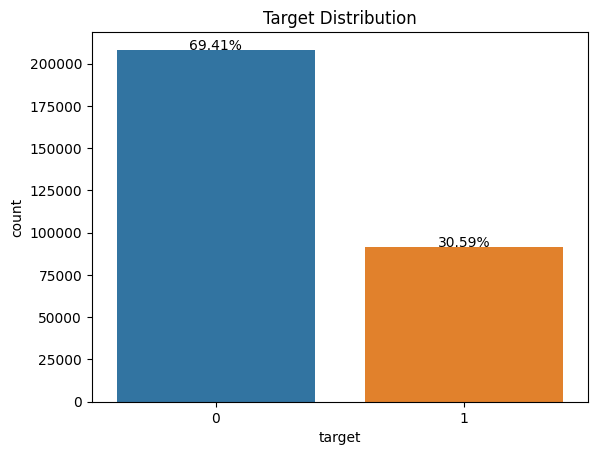

In [12]:
ax = sns.countplot(x = 'target', data = df, hue = 'target', legend = False)
ax.set_title('Target Distribution')
write_percent(ax, len(df))
plt.show()

## Binary features distribution

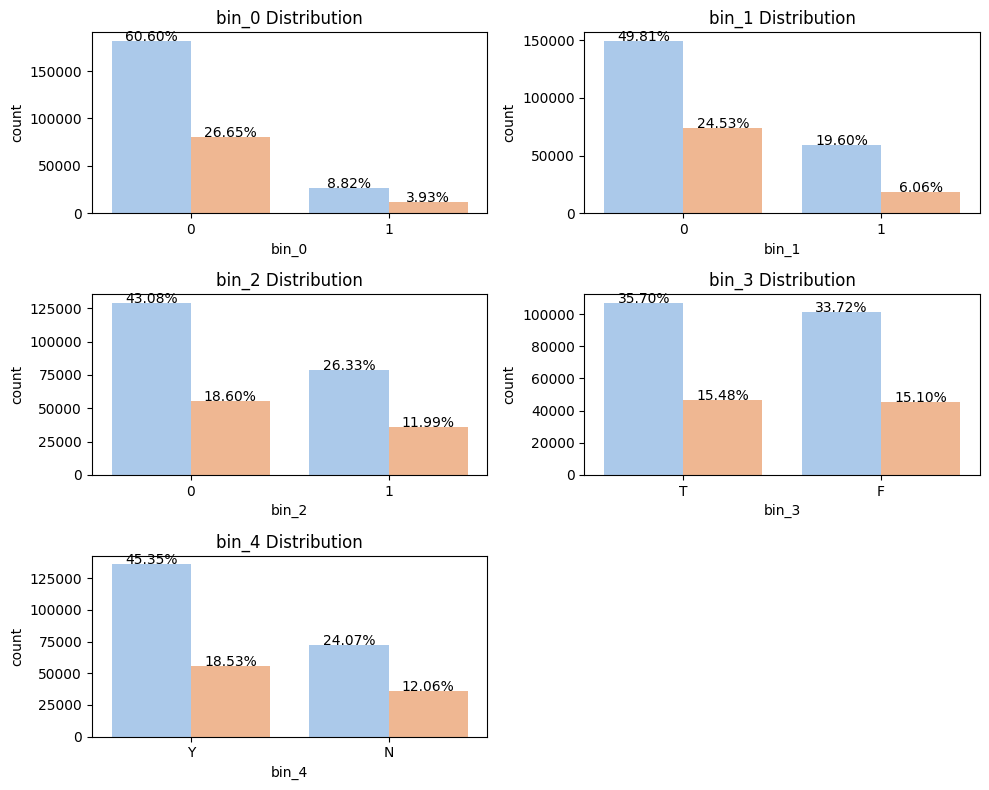

In [13]:
plt.figure(figsize = (10,8))
grid = gridspec.GridSpec(3,2)

for idx, col in enumerate(bin_cols):
    ax = plt.subplot(grid[idx])
    sns.countplot(x = col, data = df, hue = 'target', palette = 'pastel', legend = False)
    ax.set_title('{} Distribution'.format(col))
    write_percent(ax, len(df))
plt.tight_layout()
plt.show()

## Nomial features distribution

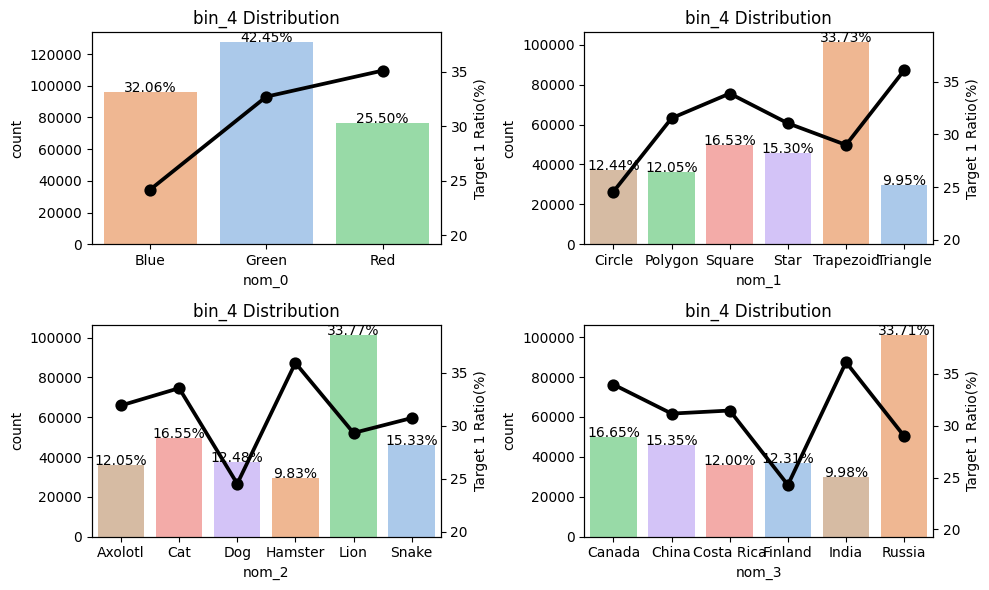

In [14]:
plot_dist_with_true_ratio(df, nom_cols[:4], num_rows=2, num_cols=2, size=(10, 6))

## Ordinary features

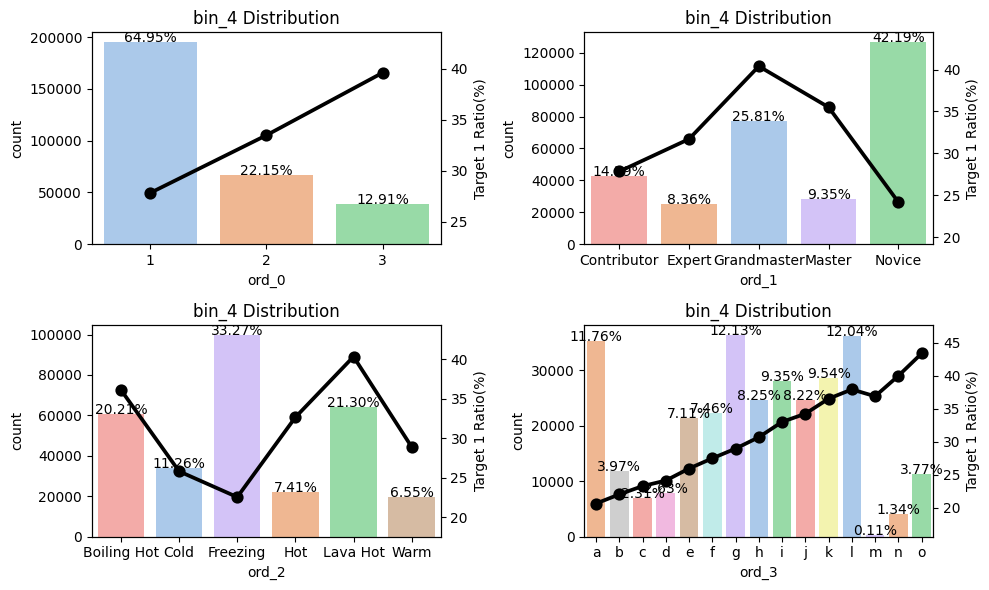

In [15]:
plot_dist_with_true_ratio(df, ord_cols[:4], num_rows=2, num_cols=2, size=(10, 6))

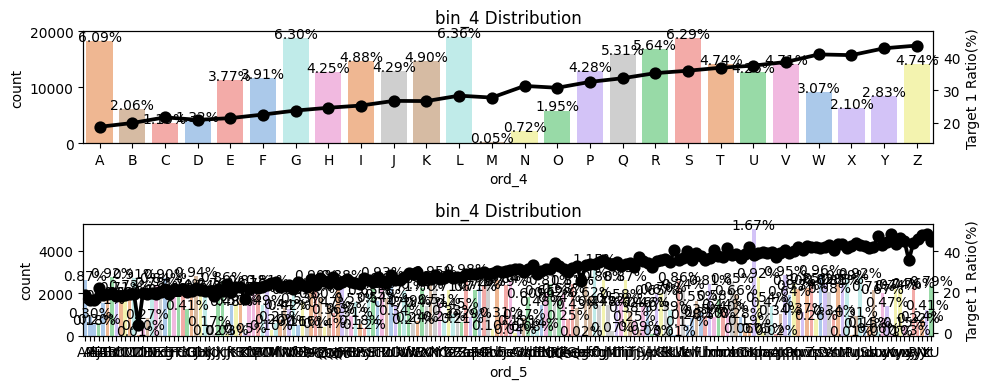

In [16]:
plot_dist_with_true_ratio(df, ord_cols[4:6], num_rows=2, num_cols=1, size=(10, 4))

## Date features

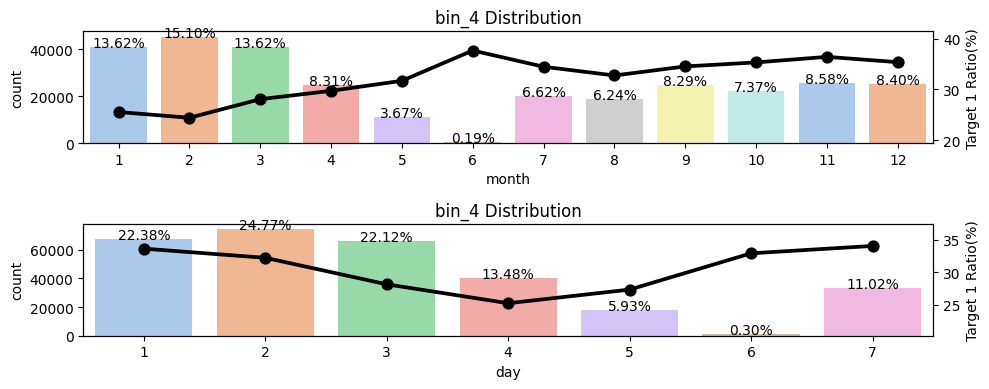

In [17]:
plot_dist_with_true_ratio(df, ['month', 'day'], num_rows=2, num_cols=1, size=(10, 4))

# Preprocessing

### Replace character value to numeric value in binary categorical feature

In [18]:
df['bin_3'] = df['bin_3'].replace({'T':1, 'F':0})
df['bin_4'] = df['bin_4'].replace({'Y':1, 'N':0})

### Reorder ordor categorical data

In [19]:
from pandas.api.types import CategoricalDtype

ord_1_dtype = CategoricalDtype(categories=['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'], ordered=True)
df['ord_1'] = df['ord_1'].astype(ord_1_dtype)

ord2_cross_tab = get_crosstab(df, 'ord_2')
ord_2_dtype = CategoricalDtype(categories = ord2_cross_tab.sort_values(1)['ord_2'].values)
df['ord_2'] = df['ord_2'].astype(ord_2_dtype)